<a href="https://colab.research.google.com/github/LuluW8071/ASR-with-Speech-Sentiment-and-Text-Summarizer/blob/main/Speech_Sentiment_Analysis/Speech_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Sentiment EDA and Data Preparation

## 01. Import Kaggle API & Download Datasets


In [ ]:
from google.colab import files

# Upload kaggle.json from kaggle_account > your_profile > API section > Create new token
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from kaggle
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
!kaggle datasets download -d ejlok1/cremad/

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 96% 414M/429M [00:02<00:00, 183MB/s]
100% 429M/429M [00:02<00:00, 154MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad/versions/
License(s): ODC Attribution License (ODC-By)
 95% 427M/451M [00:02<00:00, 173MB/s]
100% 451M/451M [00:03<00:00, 158MB/s]


## 02. Extracting & Importing Datasets

In [ ]:
from tqdm.notebook import tqdm
import zipfile
import os

zip_file_paths = [
    'ravdess-emotional-speech-audio.zip',
    'cremad.zip',
]

extracted_dir = 'dataset/'
os.makedirs(extracted_dir, exist_ok=True)

for zip_path in zip_file_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        files = zip_ref.namelist()
        for file in tqdm(iterable=files, total=len(files), desc=f'Extracting {zip_path}'):
            zip_ref.extract(file, extracted_dir)

print(f"All datasets extracted to {extracted_dir}")

Extracting ravdess-emotional-speech-audio.zip:   0%|          | 0/2880 [00:00<?, ?it/s]

Extracting cremad.zip:   0%|          | 0/7442 [00:00<?, ?it/s]

All datasets extracted to dataset/


In [ ]:
import pandas as pd
import numpy as np
import os

ravdess = 'dataset/audio_speech_actors_01-24/'
ravdess_directory_list = os.listdir(ravdess)

cremad = 'dataset/AudioWAV/'
cremad_directory_list = os.listdir(cremad)

### 2.1 RAVDESS

This portion of the RAVDESS contains **1440** files: `60 trials per actor x 24 actors = 1440`. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes **calm**, **happy** ,**sad**, **angry**, **fearful**, **surprise**, and **disgust** expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.


File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

| **Identifier**         | **Description**                                                              | **Values**                                                                        |
|------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| **Modality**           | The type of stimulus.                                                        | 01 = full-AV, 02 = video-only, 03 = audio-only                                    |
| **Vocal channel**      | The type of vocalization.                                                    | 01 = speech, 02 = song                                                            |
| **Emotion**            | The emotion expressed.                                                       | 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised |
| **Emotional intensity**| The intensity of the emotion.                                                | 01 = normal, 02 = strong (not applicable for neutral emotion)                     |
| **Statement**          | The statement spoken.                                                        | 01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door"          |
| **Repetition**         | The repetition of the statement.                                             | 01 = 1st repetition, 02 = 2nd repetition                                          |
| **Actor**              | The identifier of the actor.                                                 | 01 to 24 (Odd numbered actors are male, even numbered actors are female)          |

#### Example Filename Breakdown: `03-01-06-01-02-01-12.wav`

| **Identifier**         | **Value**  | **Description**                     |
|------------------------|------------|-------------------------------------|
| **Modality**           | 03         | Audio-only                          |
| **Vocal channel**      | 01         | Speech                              |
| **Emotion**            | 06         | Fearful                             |
| **Emotional intensity**| 01         | Normal intensity                    |
| **Statement**          | 02         | "Dogs are sitting by the door"      |
| **Repetition**         | 01         | 1st repetition                      |
| **Actor**              | 12         | Actor 12 (Female)                   |


In [ ]:
file_emotion = []
file_path = []

for i in ravdess_directory_list:
    # There are 24 diffr. actors in previous directory
    # Extracting files for each actor
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
        # Third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)

In [ ]:
# Dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Changing integers to actual emotions
# Since Calm and Neutral labels generally denote same thing asssigning label calm as neutral
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

ravdess_df.Emotions.value_counts()

Emotions
neutral     288
happy       192
angry       192
disgust     192
sad         192
surprise    192
fear        192
Name: count, dtype: int64

### 2.2 CREMA-D

CREMA-D is a data set of **7,442** original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (**Anger**, **Disgust**, **Fear**, **Happy**, **Neutral**, and **Sad**) and four different emotion levels (Low, Medium, High, and Unspecified).

In [ ]:
file_emotion = []
file_path = []

for file in cremad_directory_list:
    # storing file paths
    file_path.append(cremad + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# Create dataframes for emotions and paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Reset index to ensure no duplicate indices
emotion_df.reset_index(drop=True, inplace=True)
path_df.reset_index(drop=True, inplace=True)

### 2.3 Joining RAVDESS & CREMA-D Dataset

In [ ]:
# Concatenate dataframes along the columns
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Check for value counts of emotions
print(Crema_df.Emotions.value_counts())

Emotions
fear       1271
disgust    1271
angry      1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


In [ ]:
data_path = pd.concat([ravdess_df, Crema_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(5)

,Emotions,Path
0,happy,dataset/audio_speech_actors_01-24/Actor_22/03-...
1,angry,dataset/audio_speech_actors_01-24/Actor_22/03-...
2,angry,dataset/audio_speech_actors_01-24/Actor_22/03-...
3,disgust,dataset/audio_speech_actors_01-24/Actor_22/03-...
4,sad,dataset/audio_speech_actors_01-24/Actor_22/03-...


In [ ]:
data_path.Emotions.value_counts()

Emotions
happy       1463
angry       1463
disgust     1463
sad         1463
fear        1463
neutral     1375
surprise     192
Name: count, dtype: int64

In [ ]:
# Removing surprise label as it has low value count
data_path = data_path[data_path.Emotions != 'surprise']
data_path.Emotions.value_counts()

Emotions
happy      1463
angry      1463
disgust    1463
sad        1463
fear       1463
neutral    1375
Name: count, dtype: int64

In [ ]:
# Save the updated CSV
data_path.rename(columns={'Emotions': 'emotion', 'Path': 'path'}, inplace=True)
data_path.to_csv("audio_file.csv", index=True)

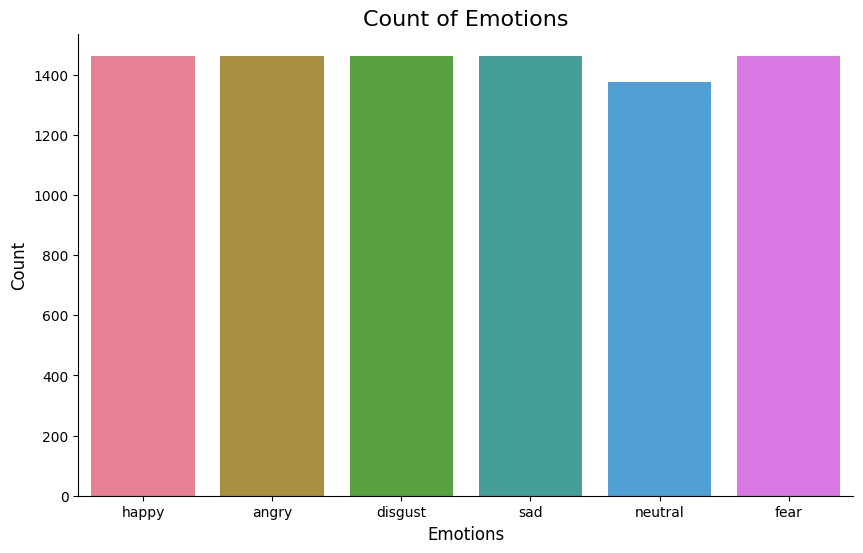

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("husl", 6)

# Plot the count of emotions
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(x='emotion', data=data_path, hue='emotion', palette=palette, legend=False)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show();

## 03. Data Augmentation

In [ ]:
import librosa
import librosa.display
from IPython.display import Audio
from tqdm.auto import tqdm

# Load saved csv file
data_path = pd.read_csv('audio_file.csv')

# Finding sampling rate
data0, sr0 = librosa.load(data_path['path'][1])
data, sr = librosa.load(data_path['path'][len(data_path)-1])
sr0, sr

(22050, 22050)

### 3.1 Generate Log Mel Spectrogram

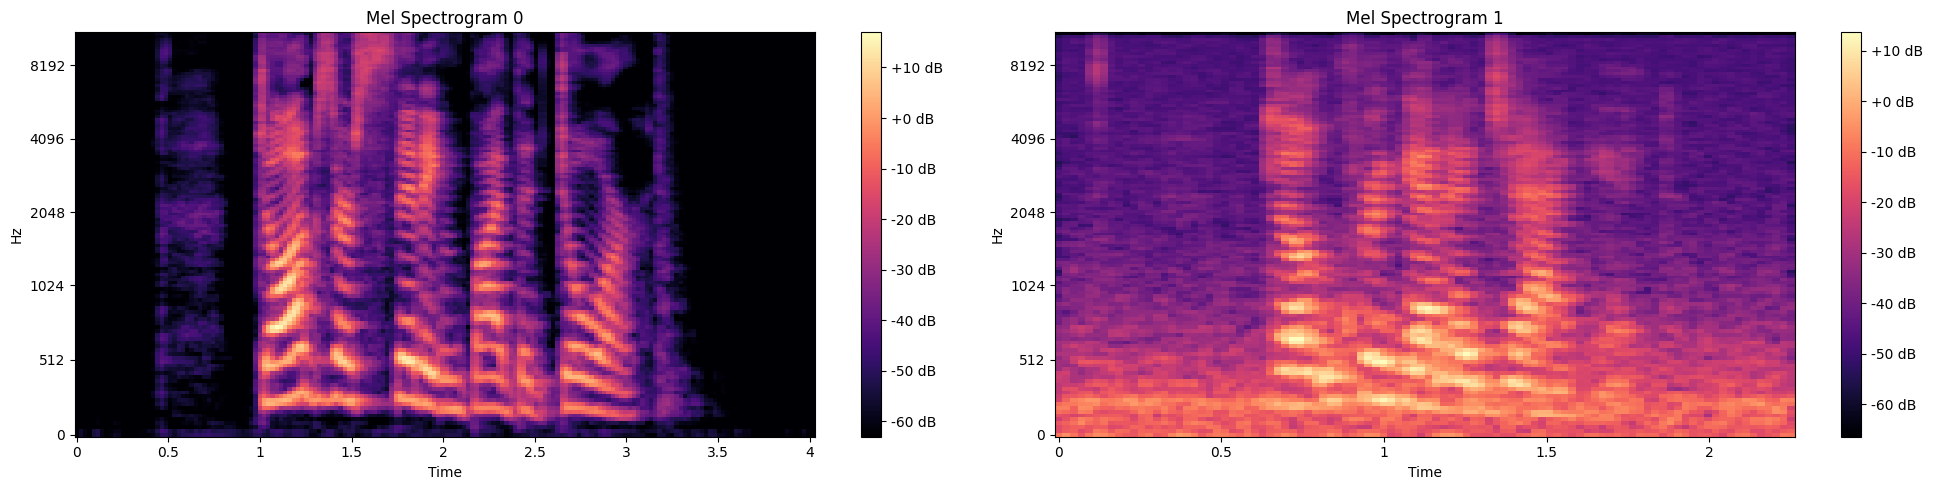

In [ ]:
# Create Mel spectrogram for data0 and data
spectrogram0 = librosa.feature.melspectrogram(y=data0, sr=sr0, n_mels=128, fmax=8000)
log_spectrogram0 = librosa.power_to_db(spectrogram0)

spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

librosa.display.specshow(log_spectrogram0, sr=sr0, x_axis='time', y_axis='mel', ax=ax[0])
ax[0].set_title('Mel Spectrogram 0')
fig.colorbar(librosa.display.specshow(log_spectrogram0, sr=sr0, x_axis='time', y_axis='mel', ax=ax[0]), ax=ax[0], format='%+2.0f dB')

librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set_title('Mel Spectrogram 1')
fig.colorbar(librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax[1]), ax=ax[1], format='%+2.0f dB')

plt.tight_layout()
plt.show();

### 3.2 Add Noise, Stretch, Shift & Pitch shift


- Data augmentation creates new synthetic data by slightly altering our original training data.
- For audio, we can generate new data by adding noise, shifting in time, changing pitch, and adjusting speed.
- The goal is to help our model become more robust to these changes and improve its ability to generalize.
- To be effective, these changes must keep the original label of the training sample.
- For images, data augmentation can involve shifting, zooming, and rotating the image.


In [ ]:
def noise(data,noise_rate=0.01):
    noise_amp = 0.01*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# Reference: https://librosa.org/doc/latest/generated/librosa.effects.time_stretch.html#librosa.effects.time_stretch
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1500)
    return np.roll(data, shift_range)

# Reference: https://librosa.org/doc/latest/generated/librosa.effects.pitch_shift.html#librosa.effects.pitch_shift
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

### 3.2.1 Original Audio Sample

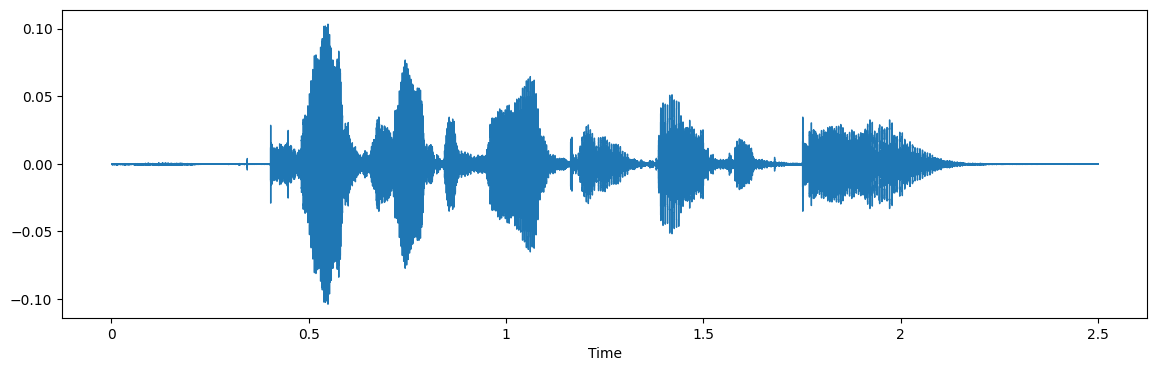

In [ ]:
path = np.array(data_path.path)[2]
data, sample_rate = librosa.load(path, duration = 2.5, offset = 0.6)
data, sample_rate = librosa.load(path, sr = None, duration = 2.5, offset = 0.6)

plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

### 3.2.2 Audio sample with noise injection

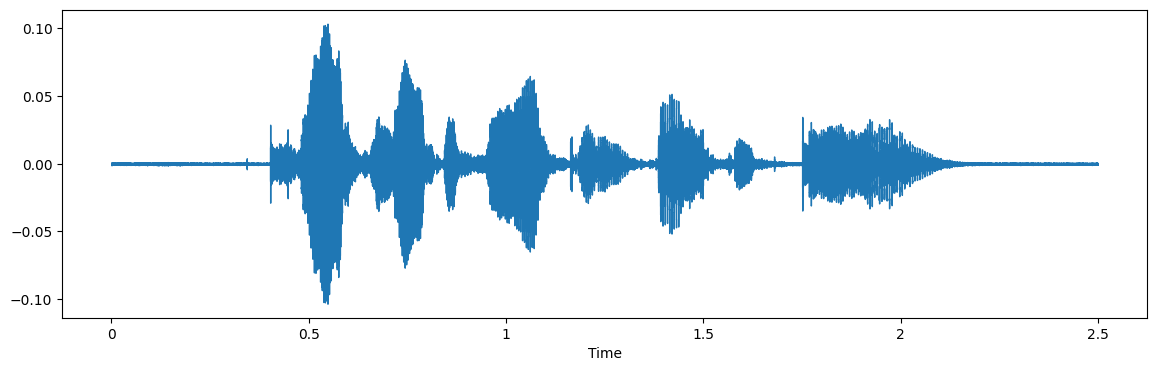

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3.2.3 Audio sample with added stretch

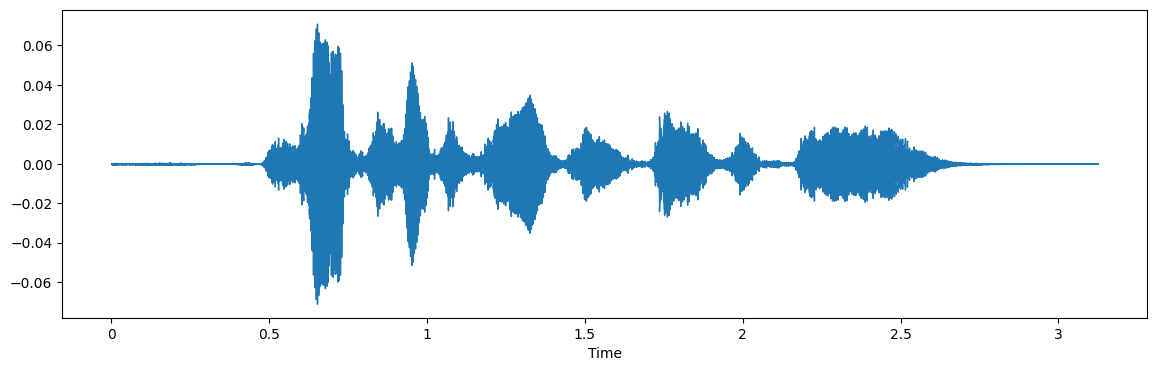

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3.2.4 Audio sample with added shifting

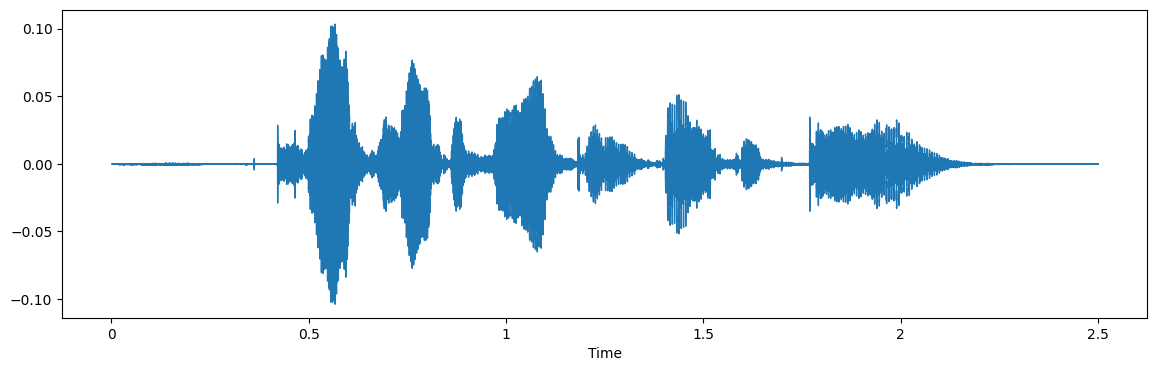

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3.2.5 Audio sample with added pitch shift

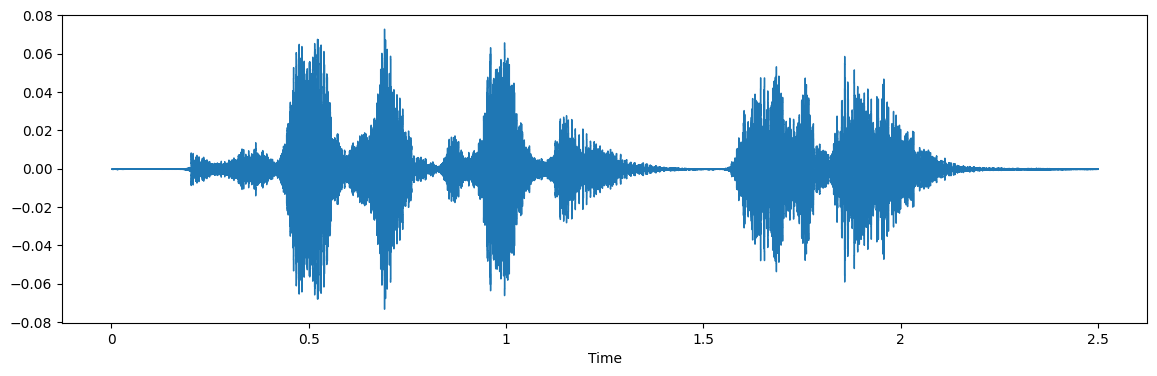

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## 04. Feature Extraction

Extracting features is crucial for analyzing and finding relationships in data. Since audio data isn't directly understandable by models, we need to convert it into a format they can understand through feature extraction.

An audio signal has three dimensions: time, amplitude, and frequency.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*7sKM9aECRmuoqTadCYVw9A.jpeg">

### [Blog](https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225)

Here are some key features:

- **Zero Crossing Rate**: How often the signal changes sign in a frame.
- **Energy**: The sum of the squares of signal values, adjusted by frame length.
- **Entropy of Energy**: Measures abrupt changes by looking at the variation in sub-frame energies.
- **Spectral Centroid**: The "center of gravity" of the spectrum.
- **Spectral Spread**: How spread out the spectrum is.
- **Spectral Entropy**: The entropy of spectral energies across sub-frames.
- **Spectral Flux**: The squared difference between the spectra of successive frames.
- **Spectral Rolloff**: The frequency below which 90% of the spectral energy is found.
- **MFCCs (Mel Frequency Cepstral Coefficients)**: Represents the spectrum on a Mel scale, which is more aligned with human hearing.
- **Chroma Vector**: Represents spectral energy in terms of the 12 pitch classes in music.
- **Chroma Deviation**: The standard deviation of the 12 chroma coefficients.

I'm not delving deeply into feature selection to see which features are best; I'm simply using these

- Zero Crossing Rate
- MFCC
- RMS (Root Mean Square) value

In [ ]:
# Zero Crossing Rate
# Reference: https://librosa.org/doc/latest/generated/librosa.feature.zero_crossing_rate.html#librosa.feature.zero_crossing_rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

# RMS Energy
# Reference: https://librosa.org/doc/latest/generated/librosa.feature.rms.html#librosa.feature.rms
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

# MFCC
# Reference: https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

# Feature Extraction of ZCR, RMS, MFCC
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start
    # and the ending of each audio files
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    # data with stretching and pitching
    data_pitch = pitch(data, sample_rate)
    res3 = extract_features(data_pitch, sample_rate)
    result = np.vstack((result, res3))

    # again data with noise
    data_noise_pitch = noise(data_pitch)
    res4 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res4))

    return result

In [ ]:
from joblib import Parallel, delayed

# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.path
emotions = data_path.emotion

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in tqdm(zip(paths, emotions)))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)

0it [00:00, ?it/s]

In [ ]:
len(X), len(Y), data_path.path.shape

(34760, 34760, (8690,))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y

# Save the csv
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy the data to drive
!cp /content/drive/My\ Drive/speech_emotion.csv speech_emotion.csv

## 05. Data Preparation

In [ ]:
import pandas as pd
import numpy as np

Emotions = pd.read_csv('speech_emotion.csv')
Emotions=Emotions.fillna(0)

print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(34760, 2377)